**Note:** The assignment was done by self-study and interaction during group study session with peers. References to all external resources have been attached in form of comments. 

Mostly used Resources:
1. Course Textbook,  Lecture Slides
2. Lab Solutions
3. Stackoverflow - https://stackoverflow.com/
4. pyimagesearch - https://pyimagesearch.com/ 
5. OpenCV documentation - https://docs.opencv.org/4.x/

### Introduction to Computer Vision (Fall 2022)
Instructor: Muhammad Fahim \\
TA: Batoul Yaseen, Karam Almaghout

##ِ Assignment 1

**Grading Criteria:**

Task1: 15%

Task2: 25%

Task3: 30%

Task4: 30%


**Notes**

Non working code is 0 - no matter what is writtern in the code 

Student must solve the question using the required method mentioned in that question. For example, if the question asks to use "connected components" and the student solved it with another method he/she will get 0 for that question.

----------
Write you own code if we find plagiarism then score will be 0  for similar code to both students.

late submission penalty: -20%/day

Deadline 3rd of October (End of the day)

download images

In [1]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# Remove grid lines
import numpy as np
import time
import cv2
import math
import scipy.stats as st

!wget https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0 -O th_img.jpg
!wget https://www.dropbox.com/s/e9y352iocrc2bpt/cnt_img.jpg?dl=0 -O cnt_img.jpg
!wget https://www.dropbox.com/s/y61wbt48ztiwr1y/scene1.jpg?dl=0 -O scene.jpg
!wget https://www.dropbox.com/s/cgxrvpmtlouinxo/book1.jpg?dl=0 -O book.jpg
!wget https://www.dropbox.com/s/agjglpthhstnm6f/final%20%281%29.jpg?dl=0 -O final_template.jpg
!wget https://www.dropbox.com/s/56zqbf11pkzn8qx/classification%20%281%29.jpg?dl=0 -O classes.jpg
!wget https://www.dropbox.com/s/scbsb0rqx490lmm/blocks.jpg?dl=0 -O blocks.jpg
!wget https://www.dropbox.com/s/8ilfln1bsvw9ol6/labeled_blocks.jpg?dl=0 -O blocks_labeld.jpg

--2022-10-03 11:57:31--  https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4we7dhwj4pv8zx1/image-asset.jpeg [following]
--2022-10-03 11:57:32--  https://www.dropbox.com/s/raw/4we7dhwj4pv8zx1/image-asset.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc39484e970c0f1cd0bd3e1adf8f.dl.dropboxusercontent.com/cd/0/inline/BuHmnXvrkk3VZAF0DT_x0XAIaXJ0ZjnDtNyDbW2po8-TrAUx9UrxChJCxJE6JI9HPbHKYHzwfJE6thNHj2kApNyGYWtZLJsvDCQWG29fOE_9eR_-yd_FFiJxaYaI2rfHf_stbhtC7esJt0Cn0RXRrWw8WCfeY0xPFdyxvFUIFE0Lxw/file# [following]
--2022-10-03 11:57:32--  https://uc39484e970c0f1cd0bd3e1adf8f.dl.dropboxusercontent.com/cd/0/inline/BuHmnXvrkk3VZAF0DT_x0XAIaXJ0ZjnDtNyDbW2po8-TrAUx9UrxChJCxJE6

Helper functions - it is optional to use them

In [2]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# function for colors arrat generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]

### Task 1: Adaptive Thresholding
Given an image (colored and gray scale), implement adaptive thresholding from scratch and output as a thresholded binary image.

Use interactive interface to allow setting the block size, method, the constant C, and Sigma (in case you are using Gaussian method) as follows


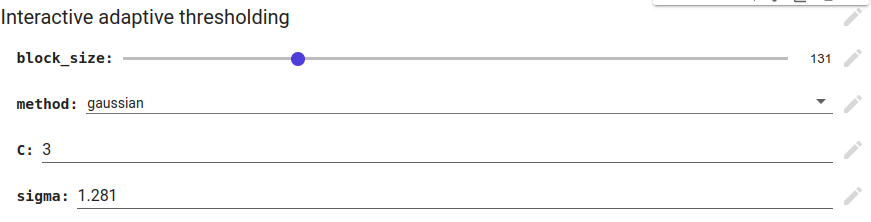

use this image to test your code

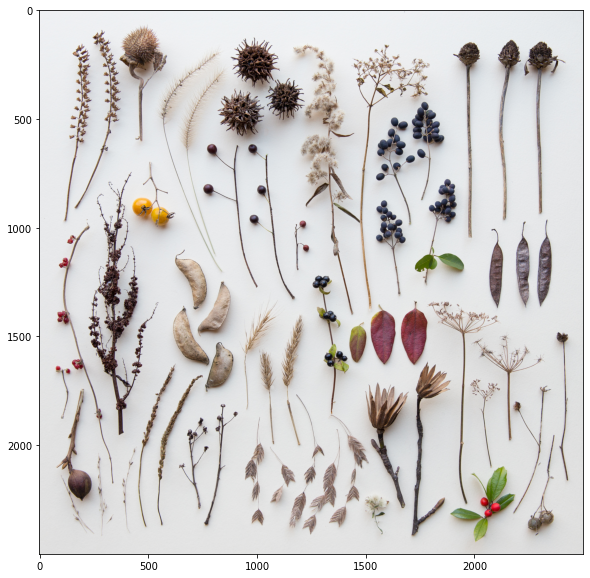

In [184]:
# DO NOT change these codes
img = cv2.imread("th_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showInRow([img])

### Solution

The solution for this task is as follows: 

I started with computing the `gaussian_kernel` using a pixel wise operation. Then completing the `adaptive_thresholding` function. For each pixel in the image take neighboorhood region with `block_size` (current pixel is the center pixel) and find `threshold` using mean or applying gaussian filter depending on the `thresholding_type`. 

Gaussian filter is computed using the following formula:

$$G(x, y) = \frac{1}{2\pi\sigma^2} \cdot e^{-\frac{x^2 + y^2}{2\sigma}}$$

I use $x = y = -2 ... 2$, where the number of elements is equal to `block_size` and $\sigma = 1$. Then, image is padded with `block_size / 2` width by $0$, so that when mean/gaussian of region will be counted for edges there won't be out of index error. 

After this, If the current pixel's value greater than threshold then it is white, otherwise it is black.

Lastly, making the interactive interface.



In [186]:
"""
The code below is inspired from labs, textbook and seniors that took Introduction to Computer Vision, Innopolis University 
"""

# compute Gaussian filter 
def get_gaussian_kern(block_size=21, sigma=2):
    """
    Function to compute the 2D gaussian kernel given block size and sigma
    filter : 2D gaussian kernel
    """
    filter = np.zeros((block_size, block_size))
    inp = np.linspace(-2, 2, block_size)
    for i, x in enumerate(inp):
      for j, y in enumerate(inp):
        filter[i][j] = sigma / (2 * np.pi) * np.exp(-(x**2 + y**2) / 2)   # use sigma = 1
    filter = filter / filter.sum()
    return filter

# compute adaptive threholding 
def adaptive_thresholding(image, thresholding_type='mean', block_size=3, C=2, sigma=1):
  """
    Function calculates adaptive thresholding for a given image
    Input:
      image: grayscale or color image
      thresholding_type: type of thresholding;
                         possible values: ’mean’ and ’gaussian’
      block_size: kernel size in which the threshold value is
                  calculated for the current pixel
    Output:
      image_bw: binary thresholded image
  """
  # convert image to gray scale if needed
  if (len(image.shape) > 2):
    try: 
      image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    except:
      image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # compute Gaussian filter 
  filter = get_gaussian_kern(block_size=21, sigma=1)
  
  # find image shape and create resulting image
  n, m = image.shape[0], image.shape[1]
  image_bw = np.zeros((n, m))
  
  # pad image
  image_gray = np.pad(image_gray, block_size//2)
  for i in range(0, n):
    for j in range(0, m):
      ix = i + block_size
      jx = j + block_size

      # take region
      block = image_gray[i:ix, j:jx] 

      # if-else clause to find the thresholding type 
      threshold = 0

      if thresholding_type == 'mean':
         # count mean of the region
        threshold = block.mean() - C 

      elif thresholding_type == 'gaussian':
        # apply gaussian filter
        block = block * filter   
        threshold = np.sum(block) - C

      else:
        print('Wrong thresholding type!')

      # apply thresholding
      if image_gray[i + block_size // 2][j + block_size // 2] > threshold:
        image_bw[i][j] = 1
  
  return image_bw

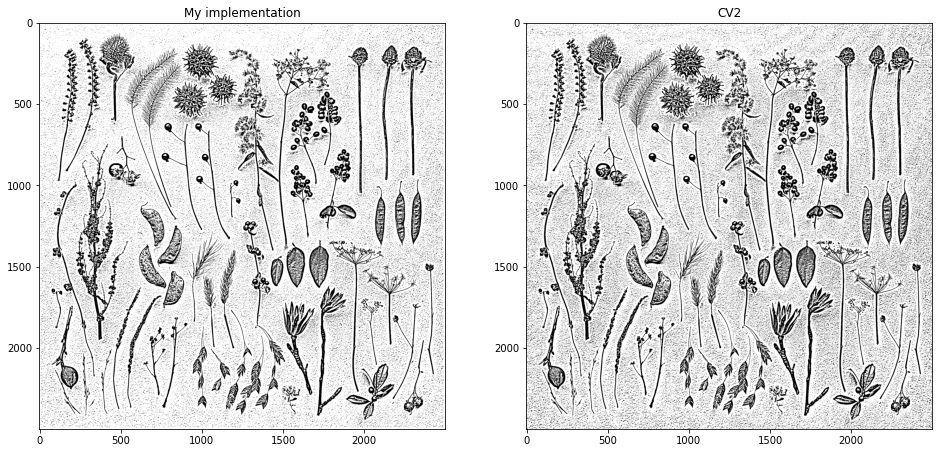

In [187]:
# interactive thresholding

# set parameters
#@title Parameters { run: "auto" }
block_size = 21 #@param {type:"slider", min:1, max:100, step:2}
thresholding_type = 'mean' #@param ["mean", "gaussian"]
C = 2 #@param {type:"integer"}
sigma = 2.0 #@param {type:"number"}

# applying the function and showing the image
image_res = adaptive_thresholding(img, thresholding_type=thresholding_type, block_size=block_size, sigma=sigma, C=C)
plt.imshow(image_res, cmap='gray')

# convert to grey 
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

# use this when thresholding_type = Mean
th1 = cv2.adaptiveThreshold(img_grey,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,2)

# use this when thresholding_type = Gaussian
# th2 = cv2.adaptiveThreshold(img_grey,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,21,2)

# displaying images
showInRow([image_res, th1], titles=["My implementation", "CV2"])  



### Task 2: Template Matching

Detect the location of the template (book.jpg) within the scene (scene.jpg)
you should solve the problem only with the method `cv2.matchTemplate`

use interactive interface to select the best method



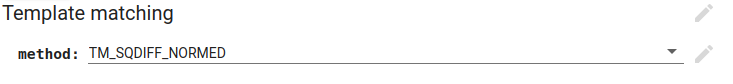

The output should be like follow:

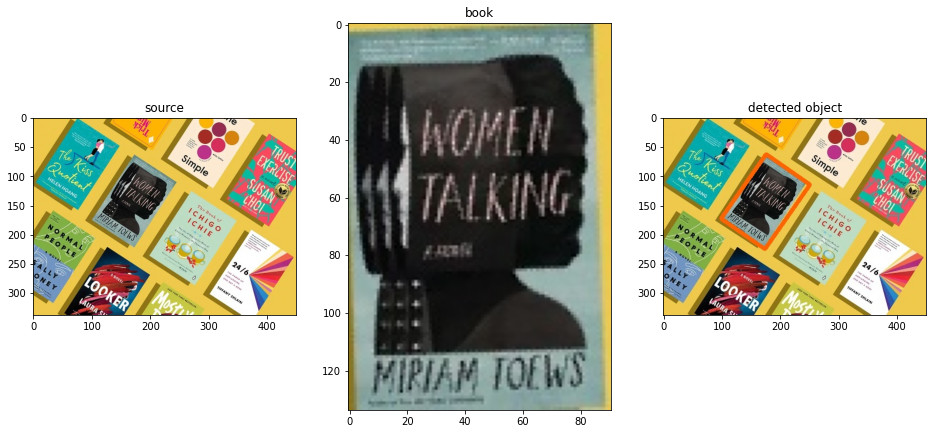

In [99]:
# DO NOT change these codes
scene = cv2.imread("scene.jpg")
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
book = cv2.imread("book.jpg")
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
final = cv2.imread("final_template.jpg")
final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
showInRow([scene, book, final],["source",  "book", "detected object"])

### Solution

The solution for this task is as follows: 
* Approach 1 - The biggest hurdle for this task was the image pre-processing part which required rotating the `source_image` to match the orientation of `book_image`. In this approach, I wrote a function to rotate an image along a point with some angle. The `rotated_image` was somehow cropped but I still passed it through the `match_template` function. Lastly, I re-rotated the output image but it had some black edges along and it was cropped, therefore I decided to discard this method. 

* Approach 2 - After the unsuccessful approach, I did a bit of research and found the `rotate_bound` function from imutils library. I repeated the same steps but this time the results were a bit better as the image was not cropped but it still had black edges. To match the size of the output image with input image and remove black edges, I wrote a function to crop the image. Lastly, I displayed the images. 

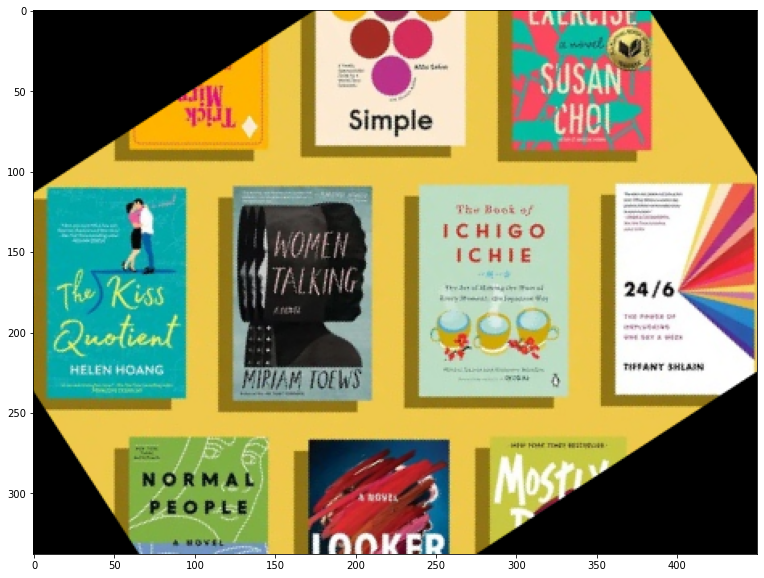

In [108]:
"""
The code below is inspired from Stackoverflow  - https://stackoverflow.com/questions/9041681/opencv-python-rotate-image-by-x-degrees-around-specific-point
"""

# function to rotate image 
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

# testing the rotated image
rot = rotate_image(scene, 33)
showInRow([rot])

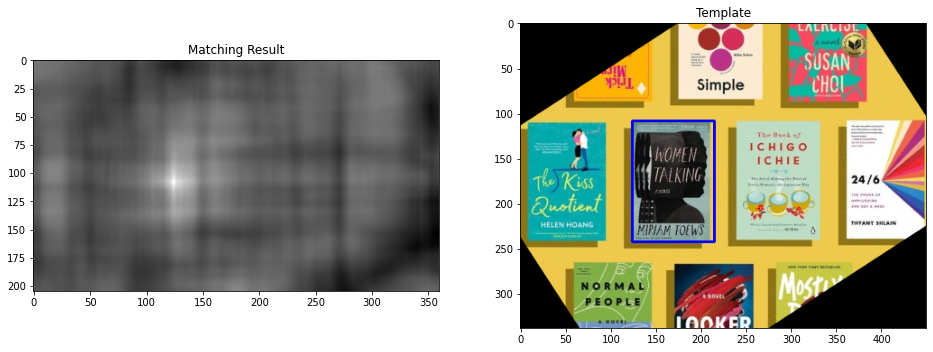

In [109]:
"""
The code below is inspired from Lab4 - Introduction to Computer Vision, Innopolis University 
"""

#@title Template matching { run: "auto" }

# different template matching methods
methods = {'TM_CCOEFF':cv2.TM_CCOEFF, 'TM_CCOEFF_NORMED':cv2.TM_CCOEFF_NORMED, 
           'TM_CCORR':cv2.TM_CCORR, 'TM_CCORR_NORMED':cv2.TM_CCORR_NORMED, 
           'TM_SQDIFF': cv2.TM_SQDIFF, 'TM_SQDIFF_NORMED':cv2.TM_SQDIFF_NORMED}

# interactive interface 
method = "TM_CCOEFF" #@param ["TM_CCOEFF", "TM_CCOEFF_NORMED", "TM_CCORR", "TM_CCORR_NORMED", "TM_SQDIFF", "TM_SQDIFF_NORMED"]

# intialising template and canvas for final image 
img_template = book
img_detected = rot.copy()

# getting height, width 
h, w, c = img_template.shape

# passing through the function
res = cv2.matchTemplate(rot,img_template,methods[method])

# finding min-max values and their location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# drawing rectange
cv2.rectangle(img_detected,top_left, bottom_right, (0,0,255), 2)

# displaying images    
showInRow([res, img_detected], ['Matching Result', 'Template'])    

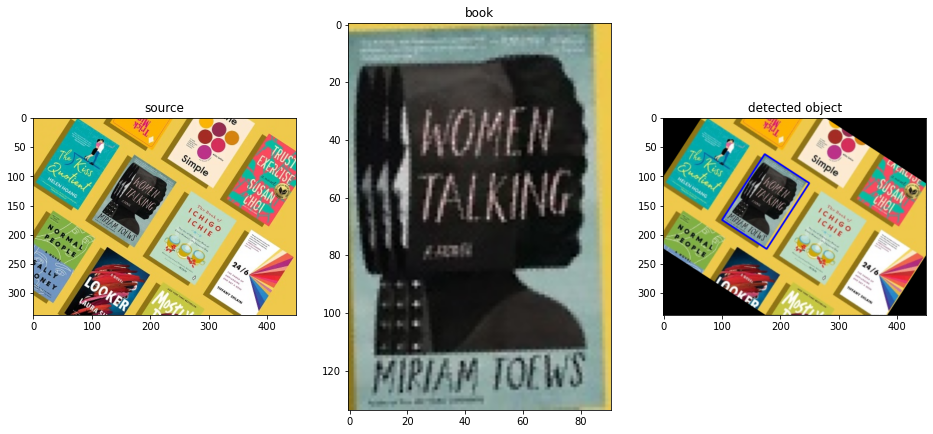

In [110]:
# re-rotating and displaying the images
template_rot = rotate_image(img_detected, -33)
showInRow([scene, book, template_rot], ["source",  "book", "detected object"])

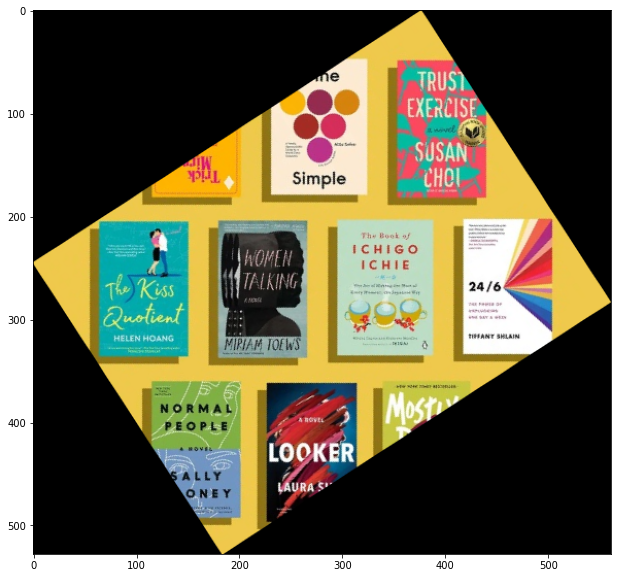

In [111]:
"""
The code below is inspired from pyimagesearch - https://pyimagesearch.com/2021/01/20/opencv-rotate-image/
"""

import imutils

# rotating the image and displaying it
rotated = imutils.rotate_bound(scene, -33)
showInRow([rotated])

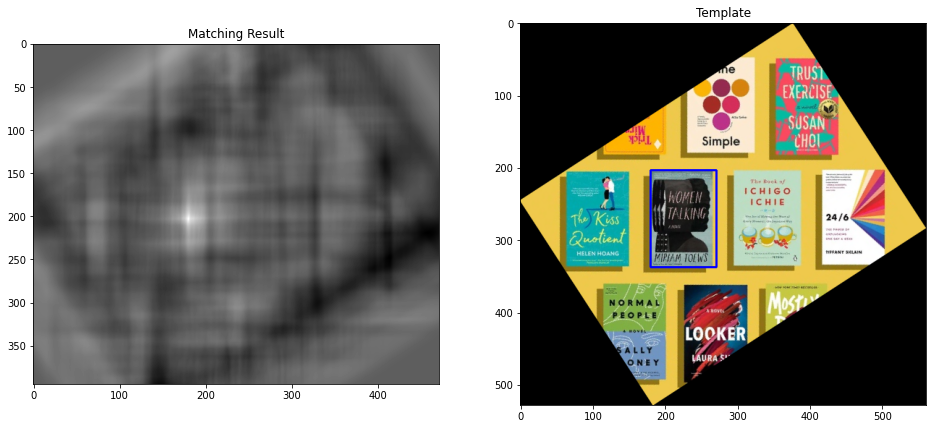

In [112]:
#@title Template matching { run: "auto" }

# different template matching methods
methods = {'TM_CCOEFF':cv2.TM_CCOEFF, 'TM_CCOEFF_NORMED':cv2.TM_CCOEFF_NORMED, 
           'TM_CCORR':cv2.TM_CCORR, 'TM_CCORR_NORMED':cv2.TM_CCORR_NORMED, 
           'TM_SQDIFF': cv2.TM_SQDIFF, 'TM_SQDIFF_NORMED':cv2.TM_SQDIFF_NORMED}

# interactive interface
method = "TM_CCOEFF" #@param ["TM_CCOEFF", "TM_CCOEFF_NORMED", "TM_CCORR", "TM_CCORR_NORMED", "TM_SQDIFF", "TM_SQDIFF_NORMED"]

# initialising template and canvas for final image
img_template = book
img_detected = rotated.copy()

# getting height and width 
h, w, c = img_template.shape

# using the matchTemplate function
res = cv2.matchTemplate(rotated,img_template,methods[method])

# getting max-min values and their positions
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# drawing rectange
cv2.rectangle(img_detected,top_left, bottom_right, (0,0,255), 2)

# displaying images    
showInRow([res, img_detected], ['Matching Result', 'Template'])    

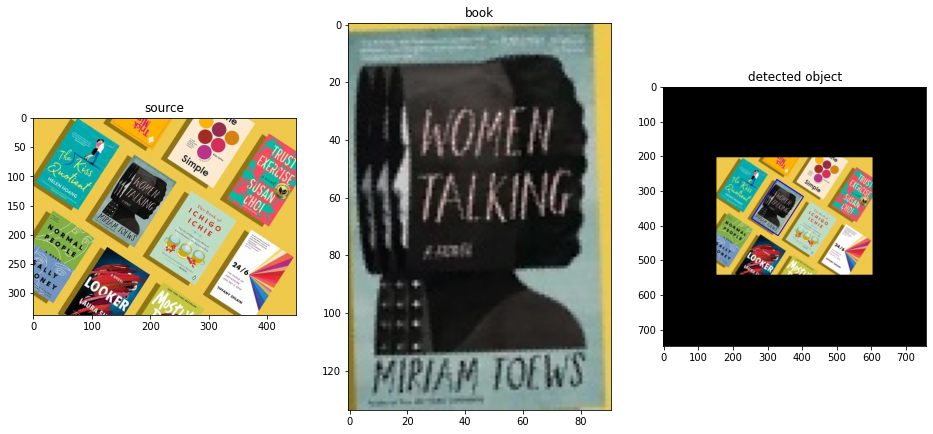

In [113]:
# re-rotating and displaying images
template_rotated = imutils.rotate_bound(img_detected, 33)
showInRow([scene, book, template_rotated], ["source",  "book", "detected object"])

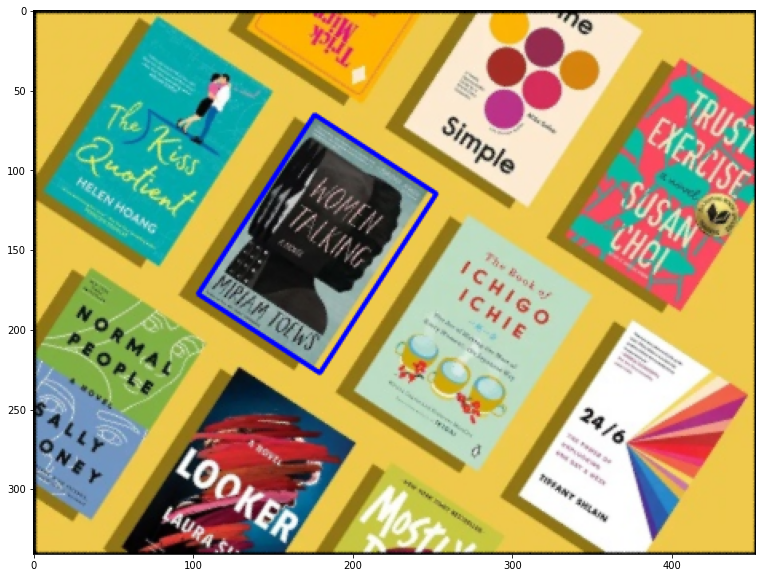

In [114]:
"""
The code below is inspired from stackoverflow - https://stackoverflow.com/questions/13538748/crop-black-edges-with-opencv
"""

# function to crop black edges
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

# testing cropped image 
cropped = crop(template_rotated)
showInRow([cropped])


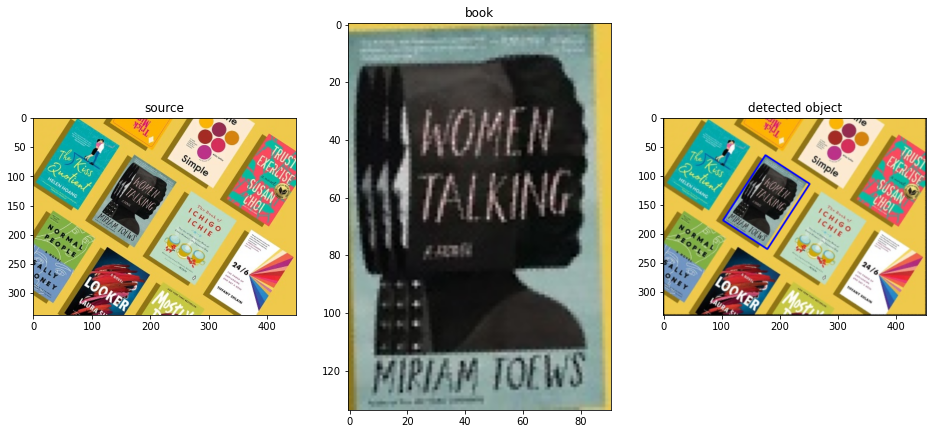

In [115]:
# displaying images
showInRow([scene, book, cropped], ["source",  "book", "detected object"])

## Task3: Classify objects using Contour features

for the following image, extract the numbre of the object, the contour of each object, then classify the objects based on their shapes and write the class number on each object as follows

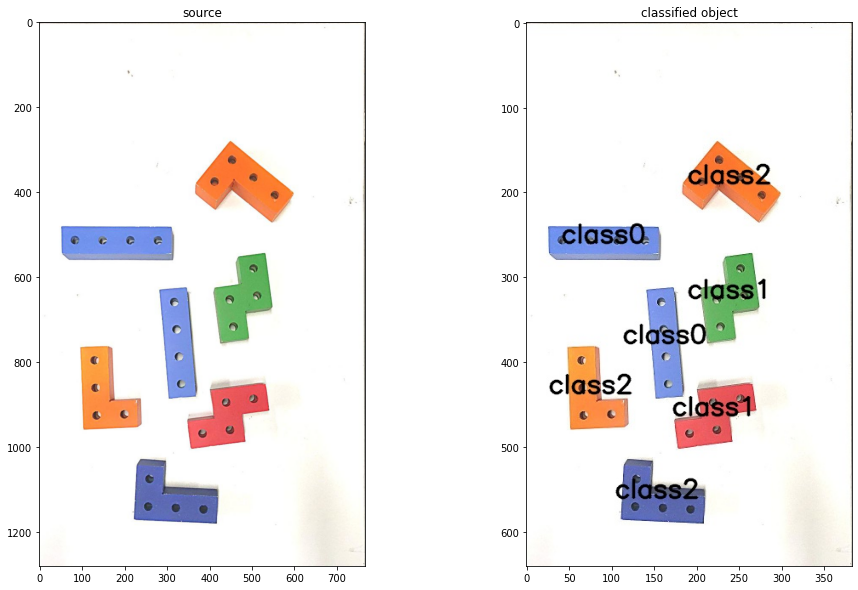

In [19]:
# DO NOT change these codes
cnt_img = cv2.imread("cnt_img.jpg")
cnt_img = cv2.cvtColor(cnt_img, cv2.COLOR_BGR2RGB)
classes = cv2.imread("classes.jpg")
classes = cv2.cvtColor(classes, cv2.COLOR_BGR2RGB)
showInRow([cnt_img, classes],["source", "classified object"])

### Solution

The solution for the classification is as follows: 
* Approach 1 - Started with an aim to find a way to `count_sides` of a single polygon and classify accordingly. As per this approach I tried using `canny_edge_detection` followed by `morphological_operations`. When the image pre-processing part was over, the image was ready to be passed to `find_contours` function and `draw_contours`. Lastly, I used `approxPolyDP` function to get the number of sides and create labels. I tested the code and it worked fine. But when I tried this solution on the `cnt_img` it was having some troubles in getting the labels correctly because of the holes, therefore I decided to drop this method. 

* Approach 2 - After unsuccessful attempt in the first solution, my aim was to somehow fill those holes. I did some research and found that `erosion` and `dilation` can be used to do that. Therefore I started with the `connected_components` method to get an image without holes. Tuning dilation values helped me find a smooth image that was ready to be passed to the `find_contours` function. This function correctly gave me the contours. Next step was to label them, I did it by simply counting the number of sides. 

number of sides: 6


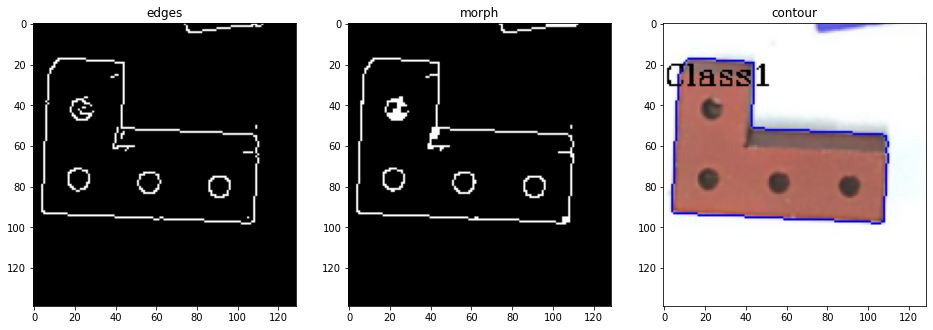

In [96]:
"""
The code below is inspired from Stackoverflow  - https://stackoverflow.com/questions/67874570/find-number-of-sides-python
"""
# load image
img = cv2.imread('/content/6.PNG')

# gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply canny edge detection
edges = cv2.Canny(gray, 90, 130)

# apply morphology close
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# get contours and keep largest
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# draw contour
contour = img.copy()
cv2.drawContours(contour, [big_contour], 0, (0,0,255), 1)

# get number of vertices (sides)
peri = cv2.arcLength(big_contour, True)
approx = cv2.approxPolyDP(big_contour, 0.03 * peri, True)
print('number of sides:',len(approx))

# writing on the image
cv2.putText(contour, "Class1", (0,30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

# displaying images
showInRow([edges, morph, contour], ["edges", "morph", "contour"])

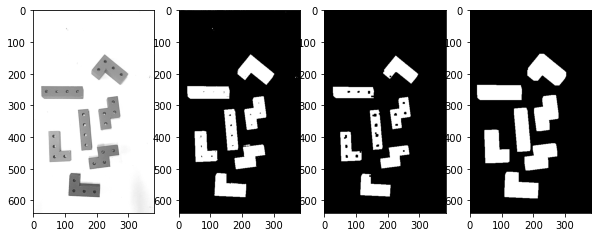

Found 7 labels!


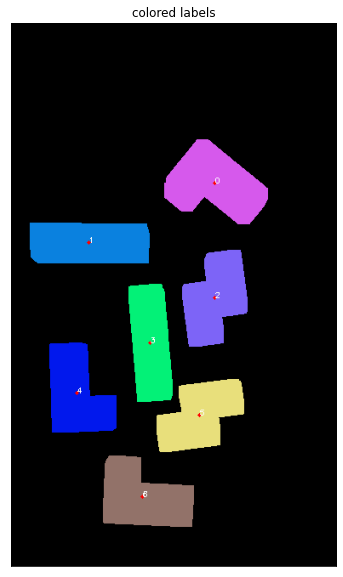

In [97]:
"""
The code below is inspired from Lab4 - Introduction to Computer Vision, Innopolis University 
"""

# reading the image to be used for processing 
img_gray = read_and_resize('cnt_img.jpg', grayscale = True)

# plotting figure
fig = plt.figure(figsize=(10, 10))

# applying threshold
ret, img_gray_bw = cv2.threshold(img_gray,220,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# setting erosion, kernel and dilation for morphological operations
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img_gray_bw, kernel, iterations = 1)
dilation = cv2.dilate(erosion, kernel, iterations = 3)

# displaying the images 
showInRow([img_gray, img_gray_bw, erosion, dilation])


# CONNECTED COMPONENTS
connectivity=8
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilation, connectivity, cv2.CV_32S)

# generating colored labels
colors = generate_colors(n_labels)

# generating image
labeled_image = np.zeros((img_gray_bw.shape[0], img_gray_bw.shape[1], 3), dtype=np.uint8)

# looping over to count and assign labels 
for (i, label) in enumerate(range(1, n_labels)):
    labeled_image[labels == label, :] = colors[i]
    cent_x, cent_y = int(centroids[label,0]), int(centroids[label,1])
    cv2.circle(labeled_image,(cent_x, cent_y), 2, (255,0,0), -1)
    cv2.putText(labeled_image, str(i), (cent_x, cent_y), cv2.FONT_HERSHEY_SIMPLEX, 0.3,(255,255,255),1)

# printing and displaying
print(f"Found {n_labels-1} labels!")
plt.title('colored labels')
plt.xticks([]),plt.yticks([])
plt.imshow(labeled_image)
plt.show()

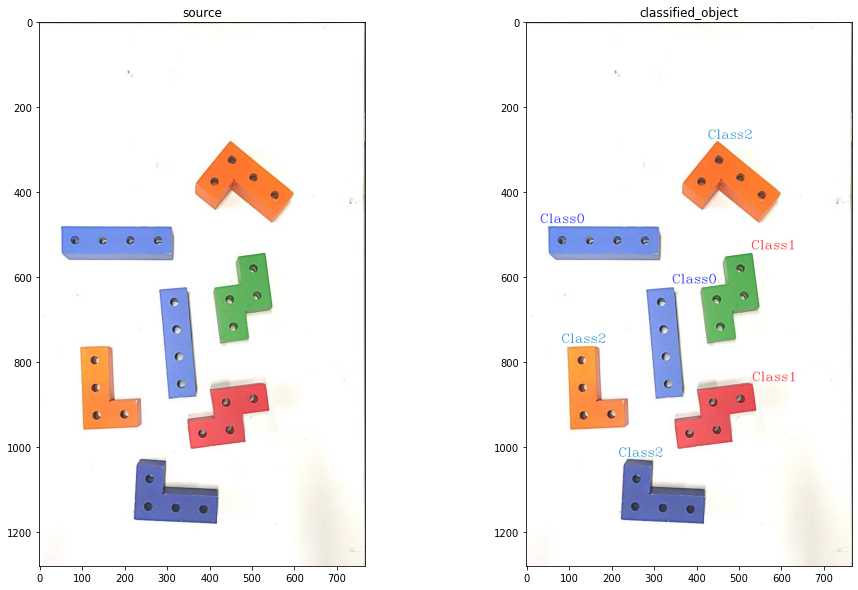

In [98]:
# loading image
img =  cnt_img.copy()

# applying thresholding and finding contours
ret , thrash = cv2.threshold(dilation, 240 , 255, cv2.CHAIN_APPROX_NONE)
contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# print(len(contours)) - Printing to make sure that the function found the contours correctly 

# looping to find the shapes of the given polygons
for contour in contours:

    # finding sides 
    approx = cv2.approxPolyDP(contour, 0.03* cv2.arcLength(contour, True), True)

    # cv2.drawContours(img, [contour], 0, (0, 0, 255), 5) - Drawing contours, needs to be scaled accordingly 

    # initalizing a tuple of coordinates to write the labels accordingly 
    x = approx.ravel()[0] - 5
    x = x * 2

    y = approx.ravel()[1] 
    y = y * 2
   
    # labelling based on the number of edges
    if len(approx) == 4:
        cv2.putText(img, "Class0", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0, 0, 255) )
    elif len(approx) == 6 :
      cv2.putText(img, "Class2", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0, 125, 200))
            
    elif len(approx) == 8 :
        cv2.putText(img, "Class1", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 0, 0))
        
# displaying images
showInRow([cnt_img, img], ["source", "classified_object"])

## Task 4: Count objects in image

Using only connected components to segment the objects in this image

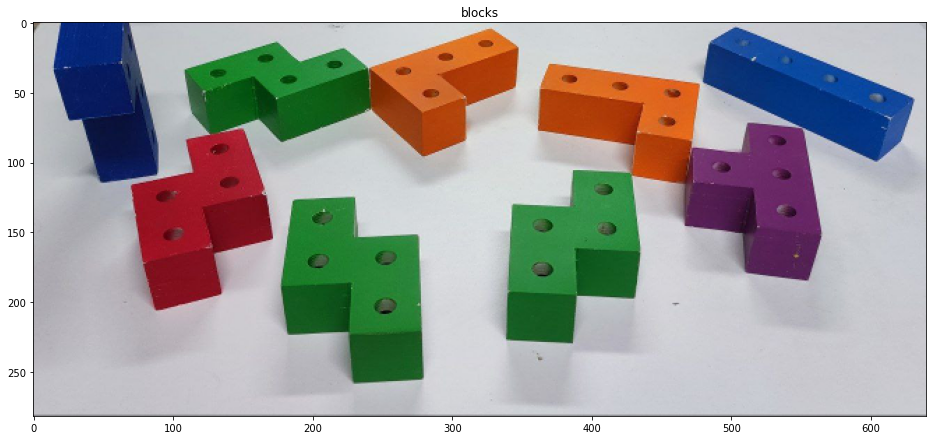

In [129]:
# DO NOT change these codes
blocks = read_and_resize("blocks.jpg")
showInRow([blocks],["blocks"])

The output should be like this

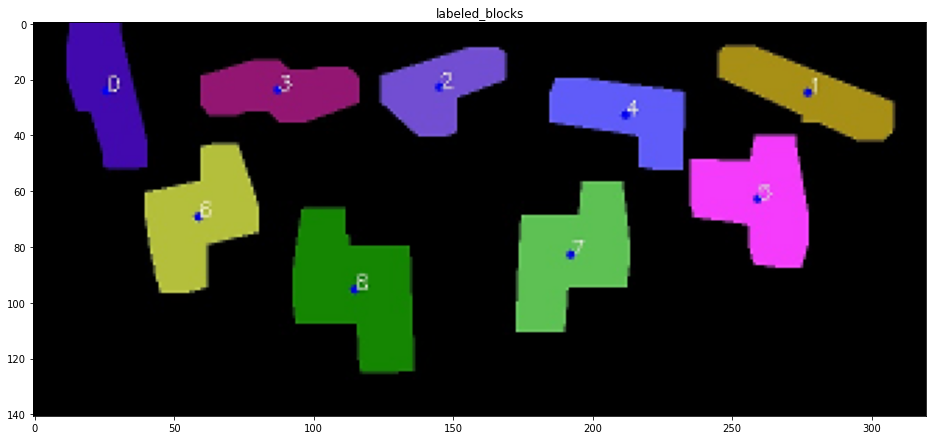

In [130]:
# DO NOT change these codes
labeled_blocks = read_and_resize("blocks_labeld.jpg")
showInRow([labeled_blocks],["labeled_blocks"])

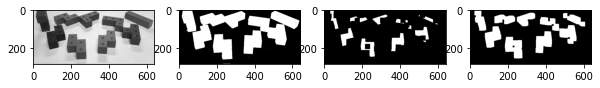

Found 9 labels!


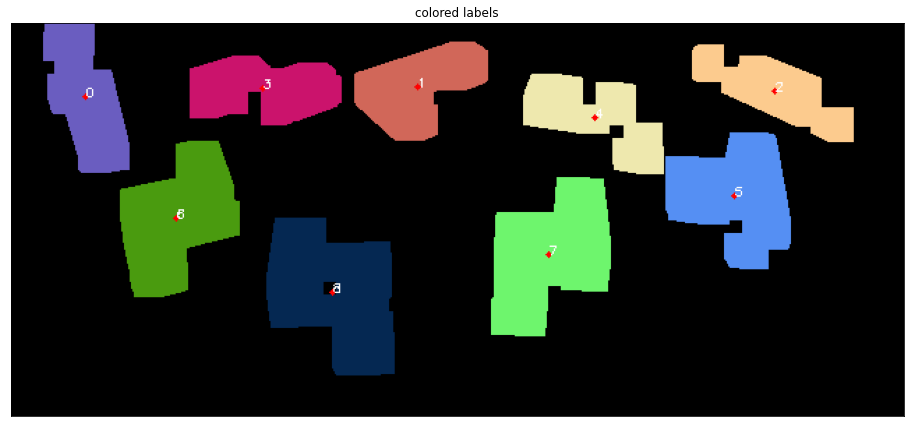

In [182]:
"""
The code below is inspired from Lab4 - Introduction to Computer Vision, Innopolis University 
"""

# coping image, converting it into grayscale 
img_blocks = blocks.copy()
img_gray = cv2.cvtColor(img_blocks, cv2.COLOR_BGR2GRAY)

# create a figure
fig = plt.figure(figsize=(10, 10))

# applying thresholding 
ret, img_gray_bw = cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# initializing kenel, erosion and dilation 
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img_gray_bw, kernel, iterations = 13)
dilation = cv2.dilate(erosion, kernel, iterations = 9)

# displaying these images 
showInRow([img_gray, img_gray_bw, erosion, dilation])

# CONNECTED COMPONENTS
connectivity=8
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilation, connectivity, cv2.CV_32S)

# generating 
colors = generate_colors(n_labels)
labeled_image = np.zeros((img_gray_bw.shape[0], img_gray_bw.shape[1], 3), dtype=np.uint8)

for (i, label) in enumerate(range(1, n_labels)):
    labeled_image[labels == label, :] = colors[i]
    cent_x, cent_y = int(centroids[label,0]), int(centroids[label,1])
    cv2.circle(labeled_image,(cent_x, cent_y), 2, (255,0,0), -1)
    cv2.putText(labeled_image, str(i), (cent_x, cent_y), cv2.FONT_HERSHEY_SIMPLEX, 0.3,(255,255,255),1)
    
print(f"Found {n_labels-1} labels!")
plt.title('colored labels')
plt.xticks([]),plt.yticks([])
plt.imshow(labeled_image)
plt.show()

It took a while to fine tune several parameters including the morphological operations and thresholding. Sadly that was the closest I could get to the `expected_output_image`. It has the same number of labels and most of the blocks retain the shape. 